## Ionization Map and Area

In this example, we will create an ionization map using real data from the HMXRB 4U 0114+65. During observations across four spectra, differences in luminosity and the Fe Kalpha line were noted.

The Fe Kalpha line manifests when the ionization parameter is below 100. We will investigate the relationship between the emitting area, characterized by an ionization parameter between 25 and 100, and the intensity (flux) of the Fe Kalpha line.


In [1]:
import xraybinaryorbit
from xraybinaryorbit import *



HELLO, nice to see you! :)

PLEASE READ THIS, IT'S VERY IMPORTANT:

These are the units that must be used within this package:

- Rstar: Solar radius
- Mstar: Solar masses
- Inclination: Sexagesimal degrees
- Periapsis: Sexagesimal degrees
- Semimajor: Stellar radius
- Periods: Days (Periods in the case of the period_sliding_window function will support any units)
- Iphase: Radians

A list of the functions contained in this package will be displayed by runing the function list_functions().

As these functions use a lot of parameters, which can sometimes be difficult to handle, we have implemented a user-friendly method for parameter input:
A form will be displayed, and the parameters will be saved in the directory for further interactions. These saved parameters will be used if new parameters are not provided.
For the function to work, the submit button must be pressed.
If the parameters are already saved within the working directory, setting "load_directly=True" no form will be disp

In [2]:
luminosity = np.array([1.30628470e+36, 6.24733539e+35, 9.38737128e+34, 4.12532189e+35])

#Lower bound, value, higher bound
feka_data = [
    [0.000054, 0.000105, 0.000157],
    [0.000004, 0.000030, 0.000056],
    [0.000000, 0.000007, 0.000015],
    [0.000012, 0.000033, 0.000055]
]

feka = pd.DataFrame(feka_data)

Loaded parameters from the provided array:
phase: 0.3
semimajor: 1.51
eccentricity: 0.15
periapsis: 100.0
Rstar: 37.0
Mstar1: 16.0
Mstar2: 1.4
wind_infinite_velocity: 1200.0
Mass_loss_rate: 1e-06
beta: 0.8
luminosity: 1.3062847e+36
bound1: 25.0
bound2: 100.0
max color coefficient is 109.98
min color coefficient is 5.86


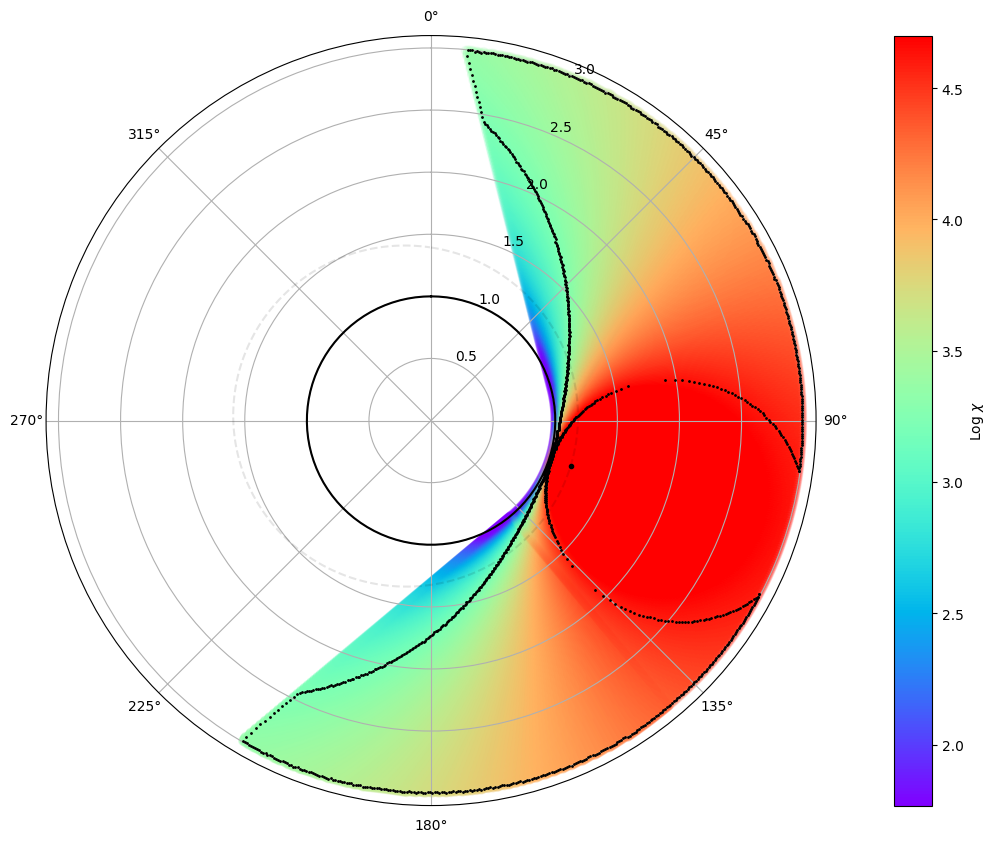

In [3]:
params=[0.3,1.51,0.15,100.0,37.0,16.0,1.4,1200.0,1e-06,0.8,1.30628470e+36,25.0,100.0]

chi1,area1 = ionization_map_phase(size_in_Rstar=3, min_color=None,max_color=None, save_plot=False, name="ionization_map"
                                  ,load_directly=False,parameter_list=params)

Loaded parameters from the provided array:
phase: 0.3
semimajor: 1.51
eccentricity: 0.15
periapsis: 100.0
Rstar: 37.0
Mstar1: 16.0
Mstar2: 1.4
wind_infinite_velocity: 1200.0
Mass_loss_rate: 1e-06
beta: 0.8
luminosity: 6.24733539e+35
bound1: 25.0
bound2: 100.0


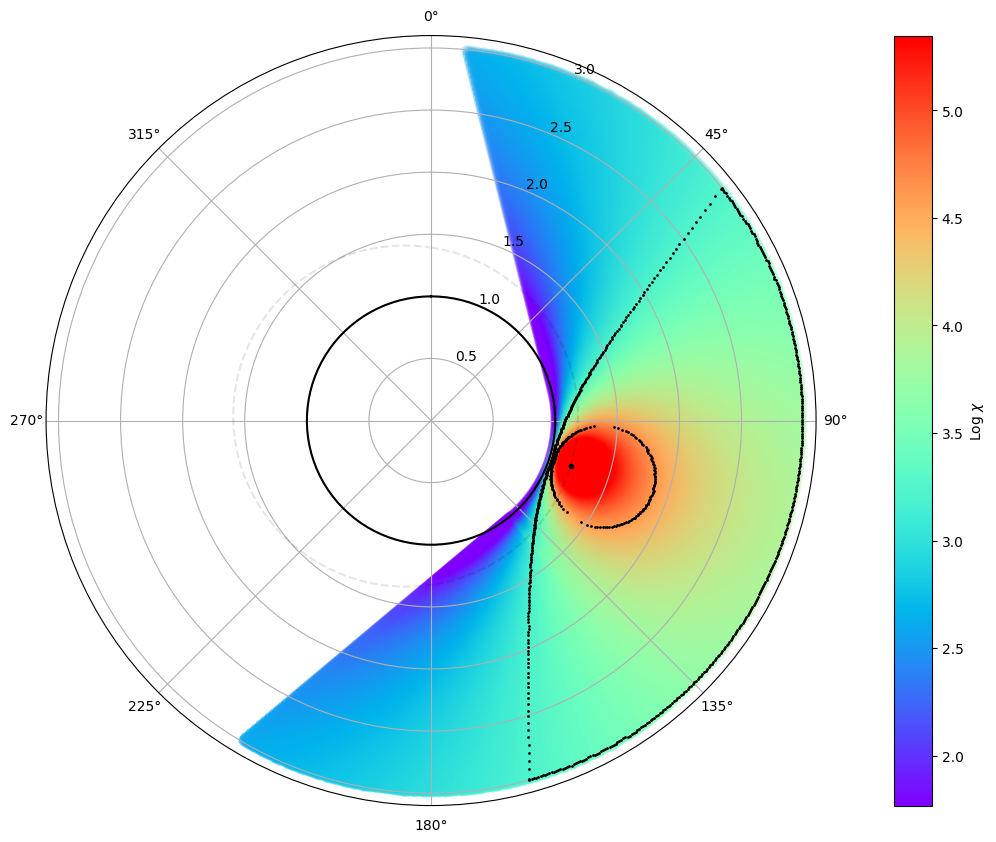

In [4]:
params=[0.3,1.51,0.15,100.0,37.0,16.0,1.4,1200.0,1e-06,0.8,6.24733539e+35,25.0,100.0]

chi2,area2 = ionization_map_phase(size_in_Rstar=3, min_color=5.86, max_color=209.98, 
                                  save_plot=False, name="ionization_map",parameter_list=params)

Loaded parameters from the provided array:
phase: 0.3
semimajor: 1.51
eccentricity: 0.15
periapsis: 100.0
Rstar: 37.0
Mstar1: 16.0
Mstar2: 1.4
wind_infinite_velocity: 1200.0
Mass_loss_rate: 1e-06
beta: 0.8
luminosity: 9.38737128e+34
bound1: 25.0
bound2: 100.0


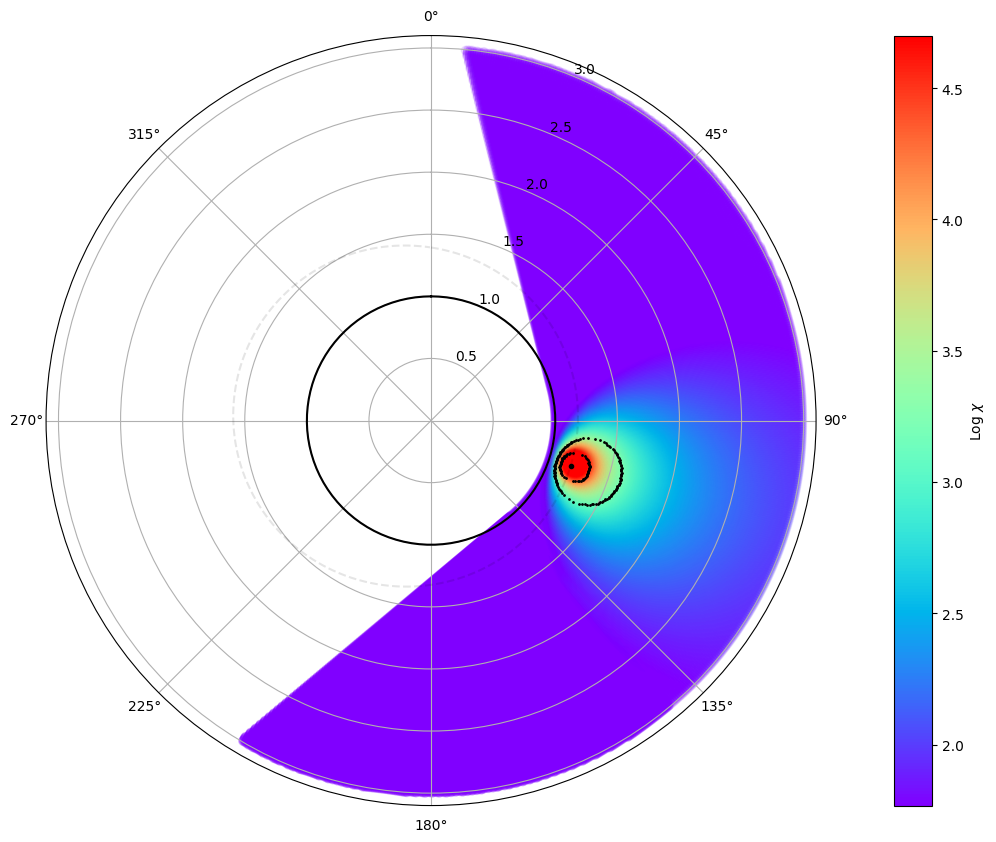

In [5]:
params=[0.3,1.51,0.15,100.0,37.0,16.0,1.4,1200.0,1e-06,0.8,9.38737128e+34,25.0,100.0]

chi3,area3 = ionization_map_phase(size_in_Rstar=3, min_color=5.86, max_color=109.98, 
                                  save_plot=False, name="ionization_map",parameter_list=params)

Loaded parameters from the provided array:
phase: 0.3
semimajor: 1.51
eccentricity: 0.15
periapsis: 100.0
Rstar: 37.0
Mstar1: 16.0
Mstar2: 1.4
wind_infinite_velocity: 1200.0
Mass_loss_rate: 1e-06
beta: 0.8
luminosity: 4.12532189e+35
bound1: 25.0
bound2: 100.0


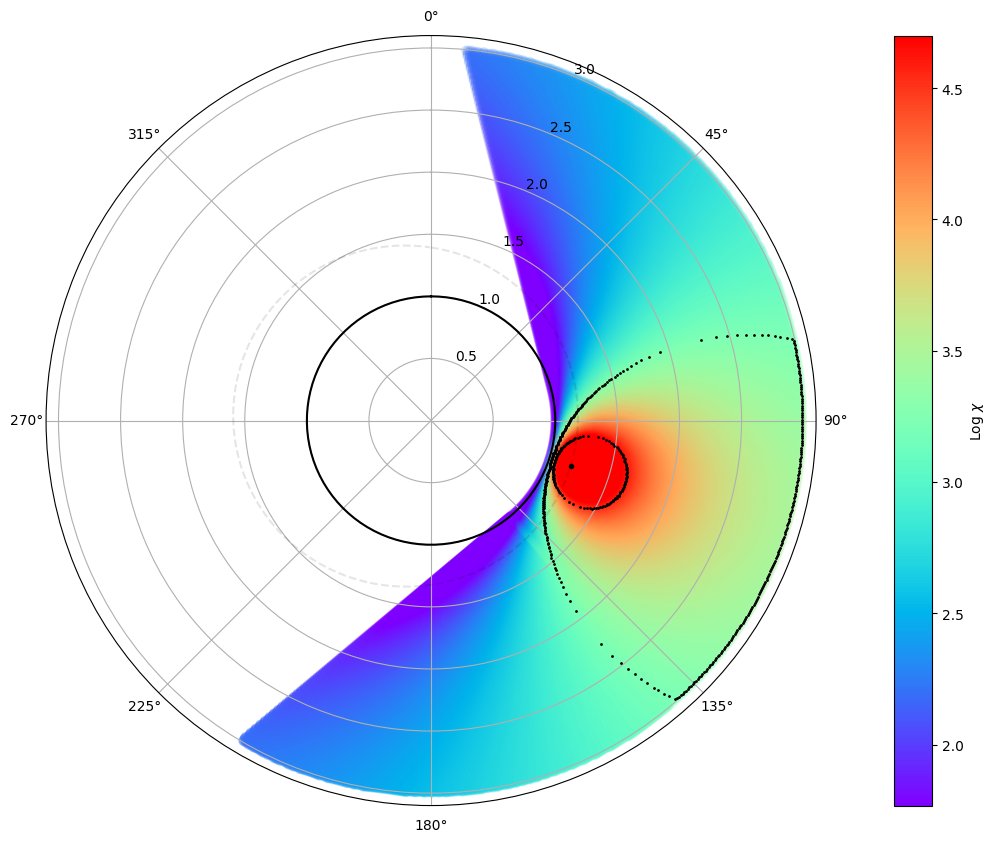

In [6]:
params=[0.3,1.51,0.15,100.0,37.0,16.0,1.4,1200.0,1e-06,0.8,4.12532189e+35,25.0,100.0]

chi4,area4 = ionization_map_phase(size_in_Rstar=3, min_color=5.86, max_color=109.98, 
                                  save_plot=False, name="ionization_map",parameter_list=params)

Text(0, 0.5, 'Fe k$_{\\alpha}$ Area (photons s$^{-1}$ cm$^{-2}$)')

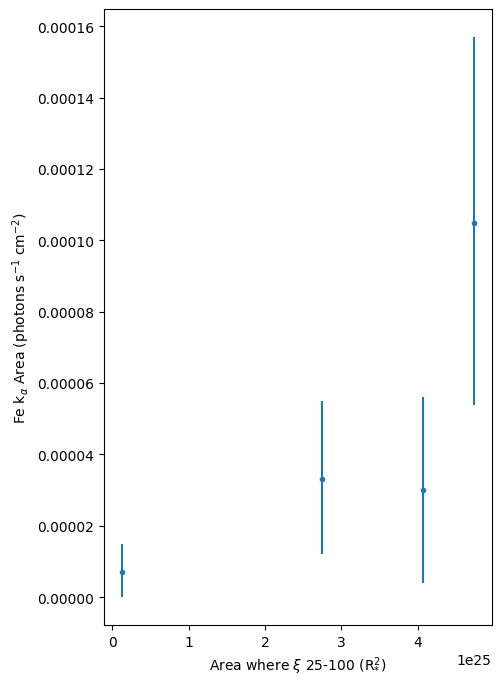

In [7]:
total_area= np.array([area1,area2,area3,area4])

yerr = np.transpose(np.diff(feka))
plt.figure(figsize=(5, 8))
plt.errorbar(total_area,feka[1], yerr=yerr, fmt=".")
plt.xlabel(r"Area where $\xi$ 25-100 (R$_{*}^{2}$)")
plt.ylabel(r"Fe k$_{\alpha}$ Area (photons s$^{-1}$ cm$^{-2}$)")
